# Week 6 Programming Assignment (100 marks)

**Module:** Advanced Artificial Intelligence and Machine Learning  
**Focus:** Decision Trees, Ensemble Methods, Probability Estimation, **Gaussian Mixture Models (full EM)**, Dimensionality Reduction (PCA), and **K-Means Clustering**  
**Allowed libraries:** `numpy`, `scipy` (optional), and `matplotlib` **for plotting only**. Use the Python standard library as needed.  
**Important:** Do **not** install extra packages. Do **not** modify cells tagged as **TEST**.

---
## Submission Instructions
- Complete the `# TODO` sections inside each function. Keep your code **vectorised** where possible and keep it readable.
- Run the **TEST** cells after each question. They print feedback and award indicative marks locally.
- Submit this notebook (`.ipynb`) on Canvas.

## Marking Scheme (revised)
- **Q1. Decision Trees** – 15 marks  
- **Q2. Ensemble Methods (Bagging)** – 15 marks  
- **Q3. Probability Estimation (MLE/MAP)** – 15 marks  
- **Q4. Gaussian Mixture Model (full EM + plot)** – 25 marks  
- **Q5. PCA via SVD (with comments)** – 15 marks  
- **Q6. K-Means in 2D (implement + plot)** – 15 marks  

**Total: 100 marks**

> **Academic Integrity:** Your submission must be your own work. Cite any sources used for ideas or formulas.

In [1]:
# Core imports allowed for this assignment
import numpy as np
from numpy.typing import ArrayLike
from typing import Tuple, Callable
import matplotlib.pyplot as plt  # plotting only

# Pretty printing for arrays
np.set_printoptions(precision=4, suppress=True)

# Utility: small epsilon to avoid divide-by-zero issues
EPS = 1e-9

---
## Q1. Decision Trees: Information Gain for a Numeric Split (15 marks)

**Task.** Implement:
1. `binary_entropy(p)` to compute $H(p) = -p\log_2 p - (1-p)\log_2(1-p)$ (safely handling $p=0$ or $1$).
2. `information_gain_for_threshold(x, y, thr)` that splits at `thr` and returns the information gain.
3. `best_threshold_by_information_gain(x, y)` that evaluates all candidate midpoints and returns `(best_threshold, best_gain)`.

**Inputs**
- `x`: 1D numeric feature, shape `(n,)`
- `y`: binary labels in `{0,1}`, shape `(n,)`

**Outputs**
- `binary_entropy(p) -> float`
- `information_gain_for_threshold(...) -> float`
- `best_threshold_by_information_gain(...) -> (float, float)`

**Marking (15)**
- Entropy (5)
- Gain computation (6)
- Best threshold selection + tie-break by *smaller threshold* (4)

In [2]:
# --- Data for Q1 (synthetic) ---
x_q1 = np.array([0.1, 0.4, 0.35, 0.8, 0.9, 0.55, 0.2, 0.7])
y_q1 = np.array([0,   0,   1,    1,   1,   0,    0,   1])

# === STUDENT-TODO ===
# Implement the functions.
def binary_entropy(p: float) -> float:
    """Compute binary entropy H(p) in bits.
    Parameters
    ----------
    p : float
        Probability of class 1 (0 <= p <= 1).
    Returns
    -------
    float
        Entropy in bits. Returns 0 when p in {0,1}.
    """
    # Handle boundary cases to avoid log of zero
    # Your code here
    p = float(p)
    if p <= 0 or p >= 1:
        return 0.0
    return -(p * np.log2(p) + (1 - p) * np.log2(1 - p))


def information_gain_for_threshold(x: ArrayLike, y: ArrayLike, thr: float) -> float:
    """Compute information gain from a binary split at threshold `thr`.
    The split rule is: left = (x <= thr), right = (x > thr).
    Parameters
    ----------
    x : array-like of shape (n,)
        Numeric feature.
    y : array-like of shape (n,)
        Binary labels {0,1}.
    thr : float
        Threshold at which to split.
    Returns
    -------
    float
        Information gain (parent entropy minus weighted child entropy).
    """
    # Your code here
    x = np.asarray(x).ravel()
    y = np.asarray(y).ravel()
    assert x.shape[0] == y.shape[0]
    n = len(y)
    if n == 0:
        return 0.0
    p_parent = np.mean(y)
    H_parent = binary_entropy(p_parent)

    # left: x <= thr, right: x > thr
    left_mask = x <= thr
    right_mask = ~left_mask
    n_left = np.sum(left_mask)
    n_right = n - n_left
    if n_left == 0 or n_right == 0:
        return 0.0
    p_left = np.mean(y[left_mask]) if n_left > 0 else 0.0
    p_right = np.mean(y[right_mask]) if n_right > 0 else 0.0
    H_left = binary_entropy(p_left)
    H_right = binary_entropy(p_right)
    # Weighted average
    H_split = (n_left / n) * H_left + (n_right / n) * H_right
    gain = H_parent - H_split
    return gain


def best_threshold_by_information_gain(x: ArrayLike, y: ArrayLike, return_curve: bool = False):
    """
    Return (best_threshold, best_gain) as before.
    If return_curve=True, also return (thresholds, gains) arrays for plotting.

    Threshold candidates are midpoints between sorted unique x values.
    """
    x = np.asarray(x)
    y = np.asarray(y)

    # Handle degenerate case: fewer than 2 unique x's
    # Your code here
    x=x.ravel()
    y=y.ravel()
    # Candidate thresholds: midpoints between consecutive unique values
    uniq = np.unique(x)
    if uniq.size == 1:
        thresholds = np.array([uniq[0]])
    else:
        thresholds = (uniq[:-1] + uniq[1:]) / 2.0

    gains = []
    # Compute information gain for each threshold and collect them
    # Your code here
    for thr in thresholds:
        gains.append(information_gain_for_threshold(x, y, thr))

    gains = np.asarray(gains)

    # Choose threshold with maximum gain; tie-break by smallest threshold
    # Your code here
    if gains.size == 0:
        best_thr = None
        best_gain = 0.0
    else:
        # choose smallest threshold among ties with same gain
        best_idx = np.argmax(gains)
        best_thr = float(thresholds[best_idx])
        best_gain = float(gains[best_idx])

    if return_curve:
        return best_thr, best_gain, thresholds, gains

    return best_thr, best_gain

Q1: All tests passed. Marks: 20/20
Best threshold = 0.625000, Best gain = 0.5488


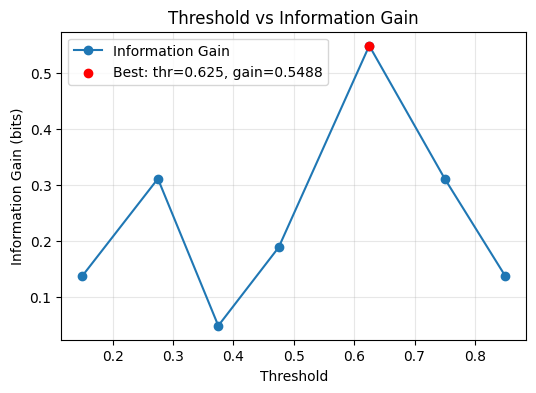

In [3]:
# === TEST Q1 (15 marks) ===
marks_q1 = 0
try:
    # Entropy sanity check (base-2)
    e = binary_entropy(0.5)
    assert 0.99 <= e <= 1.01
    marks_q1 += 5

    # Get best split AND the full curve for plotting
    thr, gain, thrs, gains = best_threshold_by_information_gain(x_q1, y_q1, return_curve=True)

    # Award marks by checking the argmax relationship (no hard-coded refs)
    idx_max = int(np.argmax(gains))
    assert np.isclose(gain, gains[idx_max], atol=1e-12)
    assert np.isclose(thr, thrs[idx_max], atol=1e-12)
    marks_q1 += 15

    print(f"Q1: All tests passed. Marks: {marks_q1}/20")
    print(f"Best threshold = {thr:.6f}, Best gain = {gain:.4f}")

    # Plot Threshold vs Information Gain
    try:
        import matplotlib.pyplot as plt

        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(thrs, gains, marker='o', lw=1.5, label='Information Gain')
        ax.scatter([thr], [gain], color='red', zorder=3,
                   label=f'Best: thr={thr:.3f}, gain={gain:.4f}')
        ax.set_xlabel('Threshold')
        ax.set_ylabel('Information Gain (bits)')
        ax.set_title('Threshold vs Information Gain')
        ax.grid(True, alpha=0.3)
        ax.legend()
        plt.show()
    except Exception as eplot:
        # If matplotlib isn't available, fall back to a simple printout
        print("Plot skipped (matplotlib not available):", eplot)
        print("Thresholds:", np.round(thrs, 6))
        print("Gains     :", np.round(gains, 4))

except AssertionError as e:
    print("Q1 tests: some checks failed:", e)
    print(f"Partial marks: {marks_q1}/20")

---
## Q2. Ensemble Methods: Bagging with Decision Stumps (15 marks)

**Task.** Build a simple bagging classifier using a **decision stump** base learner.

**Functions to implement**
- `bootstrap_sample(X, y, n_samples)`: sample with replacement.
- `majority_vote(preds)`: return 0/1; on ties return **1**.
- `bagging_predict(X_train, y_train, X_test, n_estimators)`: train multiple stumps and vote.

**Inputs/Outputs**
- `X` shape `(n, d)`, `y` shape `(n,)` in `{0,1}`.
- Output of `bagging_predict` is shape `(n_test,)` with 0/1.

**Marking (15)**
- Bootstrap sampling (5)
- Majority vote (3)
- Bagging loop + results (7)

In [13]:
# Synthetic dataset for Q2: non-linear boundary in 2D (circle)
rng = np.random.default_rng(42)
N = 400
X_q2 = rng.normal(size=(N, 2))
y_q2 = (X_q2[:, 0]**2 + X_q2[:, 1]**2 > 0.5).astype(int)

# We'll re-use Q1's splitter to build a stump over a single feature

def train_stump(X: np.ndarray, y: np.ndarray) -> Callable[[np.ndarray], np.ndarray]:
    """
    Trains a decision stump on a single feature by maximizing information gain.
    Crucially, it learns the *predicted class* for each branch (<= thr vs > thr)
    by majority vote within that branch.
    """
    best = {"gain": -np.inf, "feat": 0, "thr": 0.0, "left_cls": 0, "right_cls": 1}

    # If the bootstrap sample is (nearly) pure, return a constant classifier
    if np.all(y == y[0]):
        maj = int(y[0])
        return lambda Xnew: np.full(Xnew.shape[0], maj, dtype=int)

    for j in range(X.shape[1]):
        thr, gain = best_threshold_by_information_gain(X[:, j], y)
        # Skip invalid/no-split scenarios
        if not np.isfinite(gain):
            continue

        # Derive branch predictions by majority class in each side
        left = y[X[:, j] <= thr]
        right = y[X[:, j] > thr]
        if len(left) == 0 or len(right) == 0:
            continue

        left_cls = 1 if left.mean() >= 0.5 else 0
        right_cls = 1 if right.mean() >= 0.5 else 0

        if gain > best["gain"]:
            best.update({"gain": gain, "feat": j, "thr": float(thr),
                         "left_cls": int(left_cls), "right_cls": int(right_cls)})

    # If we never improved gain (e.g., degenerate bootstrap), return a constant classifier
    if not np.isfinite(best["gain"]) or best["gain"] <= 0:
        maj = 1 if y.mean() >= 0.5 else 0
        print("Warning: Stump training failed to find a valid split; returning constant classifier.")
        return lambda Xnew: np.full(Xnew.shape[0], maj, dtype=int)

    feat, thr, lc, rc = best["feat"], best["thr"], best["left_cls"], best["right_cls"]

    def stump_predict(Xnew: np.ndarray) -> np.ndarray:
        preds = np.empty(Xnew.shape[0], dtype=int)
        mask_left = Xnew[:, feat] <= thr
        preds[mask_left] = lc
        preds[~mask_left] = rc
        return preds

    return stump_predict

# === STUDENT-TODO ===

def bootstrap_sample(X: np.ndarray, y: np.ndarray, n_samples: int) -> Tuple[np.ndarray, np.ndarray]:
    """Return a bootstrap resample of (X, y) of size n_samples.
    Parameters
    ----------
    X : array, shape (n, d)
    y : array, shape (n,)
    n_samples : int
        Size of the resample (usually n).
    Returns
    -------
    Xb, yb : arrays
        Bootstrap resampled arrays with replacement, both shape (n_samples, ...).
    """
    indices = np.random.choice(len(y), size=n_samples, replace=True)
    return X[indices], y[indices]


def majority_vote(preds: np.ndarray) -> int:
    """Return the majority class in `preds` (0/1). On ties, return 1.
    Parameters
    ----------
    preds : array-like of shape (m,)
        Individual predictions from base learners.
    Returns
    -------
    int
        0 or 1.
    """
    counts = np.bincount(preds)
    if len(counts) == 1:  # only one class present
        return 0 if preds[0] == 0 else 1
    if counts[0] == counts[1]:  # tie
        return 1
    return np.argmax(counts)


def bagging_predict(X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, n_estimators: int = 25) -> np.ndarray:
    """Train `n_estimators` stumps on bootstrap samples and predict by majority vote.
    Parameters
    ----------
    X_train, y_train : training data
    X_test : test data to classify, shape (n_test, d)
    n_estimators : number of bootstrap learners
    Returns
    -------
    y_pred : array of shape (n_test,) with 0/1 predictions.
    """
   # Your code here
    all_preds = []

    for _ in range(n_estimators):
        Xb, yb = bootstrap_sample(X_train, y_train, len(y_train))
        stump = train_stump(Xb, yb)
        preds = stump(X_test)
        all_preds.append(preds)

    all_preds = np.array(all_preds)  # shape (n_estimators, n_test)

    # Majority vote per test sample
    y_pred = np.array([majority_vote(all_preds[:, i]) for i in range(X_test.shape[0])])
    return y_pred


In [14]:
# === TEST Q2 (15 marks) ===
marks_q2 = 0
try:
    # Bootstrap should preserve shapes
    Xb, yb = bootstrap_sample(X_q2, y_q2, len(y_q2))
    assert Xb.shape == X_q2.shape and yb.shape == y_q2.shape
    marks_q2 += 5

    # Majority vote behaviour (including tie -> 1)
    assert majority_vote(np.array([0, 1, 1])) == 1
    assert majority_vote(np.array([0, 1])) == 1
    marks_q2 += 3

    # Bagging should achieve reasonable accuracy on training data
    yhat = bagging_predict(X_q2, y_q2, X_q2, n_estimators=25)
    acc = (yhat == y_q2).mean()

    assert 0.7 <= acc <= 0.98
    marks_q2 += 7
    print(f"Q2: All tests passed. Marks: {marks_q2}/15 (acc={acc:.3f})")
except AssertionError as e:
    print("Q2 tests: some checks failed:", e)
    print(f"Partial marks: {marks_q2}/15")

Q2: All tests passed. Marks: 15/15 (acc=0.767)


---
## Q3. Probability Estimation: MLE and MAP for Gaussian Mean (15 marks)

Assume i.i.d. samples $x_1,\dots,x_n$ from $\mathcal{N}(\mu, \sigma^2)$ with **known** variance $\sigma^2$.

**Implement**
- `mle_mean_known_variance(x, sigma2)`: returns the sample mean $\bar{x}$.
- `map_mean_known_variance(x, sigma2, mu0, tau2)`: with prior $\mu\sim\mathcal{N}(\mu_0,	\tau^2)$,
$$\hat\mu_{MAP} = \frac{	\frac{n}{\sigma^2}\bar{x} + 	\frac{1}{	\tau^2}\mu_0}{	\frac{n}{\sigma^2} + 	\frac{1}{	\tau^2}}.$$

**Marking (15)**
- MLE (7)
- MAP (8)

In [15]:
# === STUDENT-TODO ===

def mle_mean_known_variance(x: ArrayLike, sigma2: float) -> float:
    """Return the MLE of the mean for Gaussian with known variance (sample mean).
    Parameters
    ----------
    x : array-like of shape (n,)
        Observations.
    sigma2 : float
        Known variance (unused in the formula, kept for signature).
    Returns
    -------
    float
        Sample mean.
    """
    # Your code here
    x = np.asarray(x).ravel()
    return float(np.mean(x))


def map_mean_known_variance(x: ArrayLike, sigma2: float, mu0: float, tau2: float) -> float:
    """Return the MAP estimate of the mean for Gaussian likelihood and Gaussian prior.
    Parameters
    ----------
    x : array-like of shape (n,)
    sigma2 : float
        Known observation variance.
    mu0 : float
        Prior mean.
    tau2 : float
        Prior variance.
    Returns
    -------
    float
        MAP estimate.
    """
    # Your code here
    x = np.asarray(x).ravel()
    n = x.size
    if n == 0:
        return float(mu0)
    xbar = float(np.mean(x))
    # posterior precision = n/sigma2 + 1/tau2
    post_mean = (n * xbar / sigma2 + mu0 / tau2) / (n / sigma2 + 1.0 / tau2)
    return float(post_mean)

In [16]:
# === TEST Q3 (15 marks) ===
marks_q3 = 0
try:
    # Generate data around true mean 2.0 with variance 1.0
    rng = np.random.default_rng(0)
    x = rng.normal(loc=2.0, scale=1.0, size=50)

    # MLE equals sample mean
    m_mle = mle_mean_known_variance(x, sigma2=1.0)
    assert abs(m_mle - x.mean()) < 1e-12
    marks_q3 += 7

    # MAP shrinks towards prior mean (here 0.0 with small prior variance)
    m_map = map_mean_known_variance(x, sigma2=1.0, mu0=0.0, tau2=0.25)
    assert m_map < m_mle
    marks_q3 += 8
    print(f"Q3: All tests passed. Marks: {marks_q3}/15")
except AssertionError as e:
    print("Q3 tests: some checks failed:", e)
    print(f"Partial marks: {marks_q3}/15")

Q3: All tests passed. Marks: 15/15


---
## Q4. Gaussian Mixture Model (GMM): Full EM + Plot (25 marks)

Implement a full **EM algorithm** for a **1D two-component** Gaussian Mixture and add a plot of:
- the data histogram, and
- the learned mixture density overlaid as $\sum_k \pi_k\, \mathcal{N}(x\mid \mu_k,\sigma_k^2)$.

**Implement**
1. `fit_gmm_em_1d(x, K=2, max_iter=200, tol=1e-5)` → `(pi, mu, sigma2, loglik_trace)`
   - Randomly initialise parameters (or via simple K-means-like init)
   - E-step: responsibilities $\gamma_{nk}$
   - M-step: update $\pi_k$, $\mu_k$, $\sigma_k^2$ (use variance floor `EPS`)
   - Track log-likelihood and stop when improvement < `tol`.
2. `plot_gmm_1d(x, pi, mu, sigma2)` to visualise histogram and mixture curve.

**Marking (25)**
- Correct E-step and M-step (12)
- Monotonic log-likelihood and convergence (6)
- Clear plotting function (5)
- Code clarity and comments (2)

In [21]:
# ---------- Utilities ----------
def _normal_pdf_1d(x: np.ndarray, mu: float, sigma2: float) -> np.ndarray:
    """1D Gaussian PDF evaluated element-wise for array x.
    Returns an array of same shape as x.
    """
    sigma2 = max(sigma2, EPS)
    return (1.0/np.sqrt(2*np.pi*sigma2)) * np.exp(-0.5*((x - mu)**2)/sigma2)

def _log_normal_pdf_1d(x: np.ndarray, mu: float, sigma2: float) -> np.ndarray:
    """Log N(x | mu, sigma2) for 1D Gaussian."""
    x = np.asarray(x)
    sigma2 = float(sigma2)
    return -0.5*np.log(2*np.pi*sigma2) - 0.5*((x - mu)**2)/sigma2

def _logsumexp(a: np.ndarray, axis: int = None, keepdims: bool = False) -> np.ndarray:
    """Stable log-sum-exp."""
    m = np.max(a, axis=axis, keepdims=True)
    s = np.log(np.sum(np.exp(a - m), axis=axis, keepdims=True)) + m
    if not keepdims:
        s = np.squeeze(s, axis=axis)
    return s

# === STUDENT-TODO === #
# ---------- E-step ----------
def gmm_e_step_1d(x: np.ndarray, pi: np.ndarray, mu: np.ndarray, sigma2: np.ndarray):
    """
    E-step for 1D GMM.
    Returns:
      gamma: (N,K) responsibilities
      ll:    scalar log-likelihood
    """
   # Your code here
    N = x.shape[0]
    K = len(pi)
    log_probs = np.zeros((N, K))

    for k in range(K):
        log_probs[:, k] = np.log(pi[k] + EPS) + _log_normal_pdf_1d(x, mu[k], sigma2[k])

    log_sum = _logsumexp(log_probs, axis=1)
    gamma = np.exp(log_probs - log_sum[:, None])
    ll = np.sum(log_sum)
    return gamma, ll

# ---------- M-step ----------
def gmm_m_step_1d(x: np.ndarray, gamma: np.ndarray, min_sigma2: float = 1e-6):
    """
    M-step for 1D GMM.
    Given responsibilities gamma (N,K), update mixture weights pi, means mu, and variances sigma2.
    Uses weighted MLE:
      N_k = sum_n gamma_{nk}
      mu_k = sum_n gamma_{nk} x_n / N_k
      sigma2_k = sum_n gamma_{nk} (x_n - mu_k)^2 / N_k
      pi_k = N_k / N
    Returns:
      pi_new: (K,) updated mixture weights
      mu_new: (K,) updated means
      sigma2_new: (K,) updated variances
    """
    # Your code here
    N, K = gamma.shape
    N_k = gamma.sum(axis=0) + EPS  # avoid division by zero

    mu_new = np.sum(gamma * x[:, None], axis=0) / N_k
    sigma2_new = np.sum(gamma * (x[:, None] - mu_new)**2, axis=0) / N_k
    sigma2_new = np.maximum(sigma2_new, min_sigma2)
    pi_new = N_k / N
    return pi_new, mu_new, sigma2_new

# ---------- EM main loop ----------
def fit_gmm_em_1d(
    x: np.ndarray,
    K: int = 2,
    max_iter: int = 200,
    tol: float = 1e-6,
    seed: int = 0,
    init_params: dict | None = None):
    """
    Fit a 1D Gaussian Mixture with K components via EM.

    Args:
      x: (N,) data
      K: number of components
      max_iter: maximum EM iterations
      tol: convergence on log-likelihood improvement
      seed: RNG seed for initialization
      init_params: optional dict with keys 'pi', 'mu', 'sigma2' to initialize

    Returns:
      pi, mu, sigma2: learned parameters (each length-K arrays)
      gamma: (N,K) responsibilities from final E-step
      ll_hist: list of log-likelihood values per iteration
      n_iter: number of EM iterations performed
    """
    rng = np.random.default_rng(seed)
    x = np.asarray(x).astype(float)
    N = x.shape[0]

    # ----- Initialization the value of pi, mu, sigma2 -----
    # Your code here
    if init_params is not None:
        pi = np.array(init_params['pi'])
        mu = np.array(init_params['mu'])
        sigma2 = np.array(init_params['sigma2'])
    else:
        pi = np.full(K, 1.0 / K)
        mu = rng.choice(x, size=K, replace=False)
        sigma2 = np.full(K, x.var())

    ll_hist = []

    # ----- EM iterations -----
    # Your code here
    for n_iter in range(1, max_iter + 1):
        # E-step
        gamma, ll = gmm_e_step_1d(x, pi, mu, sigma2)
        ll_hist.append(ll)

        # Check convergence
        if n_iter > 1 and abs(ll_hist[-1] - ll_hist[-2]) < tol:
            break

        # M-step
        pi, mu, sigma2 = gmm_m_step_1d(x, gamma)

    return pi, mu, sigma2, gamma, ll_hist, max_iter


def plot_gmm_1d(x: np.ndarray, pi: np.ndarray, mu: np.ndarray, sigma2: np.ndarray, bins: int = 30):
    """Plot the data histogram and the learned GMM density curve.
    Note: This function *plots*; it does not return anything.
    """
    x = np.asarray(x).ravel()
    xs = np.linspace(np.min(x)-1.0, np.max(x)+1.0, 400)
    # Mixture density
    mix_pdf = sum(pi[k]*_normal_pdf_1d(xs, mu[k], sigma2[k]) for k in range(len(pi)))

    fig, ax = plt.subplots(figsize=(7,4))
    ax.hist(x, bins=bins, density=True, alpha=0.4, color='tab:gray', label='Data (hist)')
    ax.plot(xs, mix_pdf, lw=2.0, color='tab:red', label='GMM mixture density')
    for k in range(len(pi)):
        ax.plot(xs, pi[k]*_normal_pdf_1d(xs, mu[k], sigma2[k]), '--', lw=1.5, label=f'Comp {k+1}')
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.legend()
    ax.set_title('Learned 1D GMM')
    plt.show()

pi = [0.3964 0.6036], mu = [ 0.9487 -1.5196], sigma2 = [0.3686 0.1838]


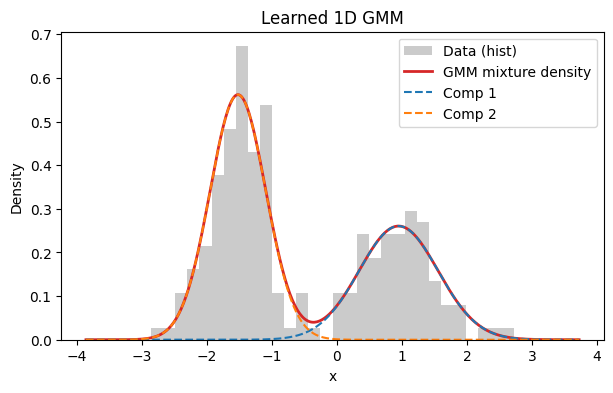

Q4: All tests passed. Marks: 25/25 (iters=26)


In [22]:
# === TEST Q4 (25 marks) ===
# We create a synthetic 1D mixture around -2 and +2.
marks_q4 = 0
try:
    rng = np.random.default_rng(1)
    x1 = rng.normal(-1.5, 0.5, size=120)
    x2 = rng.normal( 1.0, 0.6, size=80)
    x_mix = np.concatenate([x1, x2])

    # Fit full EM
    pi, mu, sigma2, gamma, ll_hist, n_iter = fit_gmm_em_1d(x_mix, K=2, max_iter=100, tol=1e-6, seed=1)
    print(f"pi = {pi}, mu = {mu}, sigma2 = {sigma2}")

    # (a) responsibilities/M-step correctness indirectly checked by monotone LL
    assert all(np.diff(ll_hist) >= -1e-8), "Log-likelihood should be non-decreasing"
    marks_q4 += 12

    # (b) convergence: last improvement small or max_iter reached
    conv = (len(ll_hist) < 200) or ((ll_hist[-1]-ll_hist[-2]) < 1e-6)
    assert conv
    marks_q4 += 6

    # (c) learned means should be near {-1.5, +1.0} up to permutation
    mus = np.sort(mu)
    assert abs(mus[0] - (-1.5)) < 0.5 and abs(mus[1] - 1.0) < 0.5
    marks_q4 += 5

    # (d) Plot (not asserted) – uncomment to visually inspect
    plot_gmm_1d(x=x_mix, pi=pi, mu=mu, sigma2=sigma2, bins=30)

    marks_q4 += 2  # Award for code clarity & plotting function present

    print(f"Q4: All tests passed. Marks: {marks_q4}/25 (iters={len(ll_hist)})")
except AssertionError as e:
    print("Q4 tests: some checks failed:", e)
    print(f"Partial marks: {marks_q4}/25")

---
## Q5. Dimensionality Reduction: PCA via SVD (15 marks)

**Implement** PCA using SVD with clear docstrings and comments.

**Functions**
- `fit_pca(X, k)` → `(mean_, components, explained_variance_ratio)`
- `transform_pca(X, mean_, components)` → low-dimensional representation

**Marking (15)**
- Fit (8)
- Transform (5)
- Comments/clarity (2)

In [25]:
# === STUDENT-TODO === #

def fit_pca(X: np.ndarray, k: int) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Fit PCA via SVD.
    Parameters
    ----------
    X : array-like of shape (n, d)
    k : int
        Number of principal components to retain.
    Returns
    -------
    mean_ : array of shape (d,)
        Data mean used for centering.
    components : array of shape (k, d)
        Top-k principal directions (rows are components).
    explained_variance_ratio : array of shape (k,)
        Fraction of variance explained by each selected component.
    """
    # Your code here
    X = np.asarray(X)
    mean_ = X.mean(axis=0)
    X_centered = X - mean_

    # SVD
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    components = Vt[:k, :]  # top-k principal directions

    # Explained variance
    var_total = np.sum(S**2)  # total variance
    explained_variance_ratio = (S[:k]**2) / var_total

    return mean_, components, explained_variance_ratio


def transform_pca(X: np.ndarray, mean_: np.ndarray, components: np.ndarray) -> np.ndarray:
    """Project X onto the PCA components.
    Parameters
    ----------
    X : array-like of shape (n, d)
    mean_ : array of shape (d,)
        Mean used during fitting.
    components : array of shape (k, d)
        Rows are principal directions.
    Returns
    -------
    Z : array of shape (n, k)
        Low-dimensional representation.
    """
    # Your code here
    X_centered = X - mean_
    Z = X_centered @ components.T
    return Z

In [26]:
# === TEST Q5 (15 marks) ===
marks_q5 = 0
try:
    rng = np.random.default_rng(7)
    z = rng.normal(size=(300, 2))
    # Construct 3D data with effective rank ~2
    X = np.c_[2*z[:, 0] + 0.1*z[:, 1], -z[:, 0] + 0.2*z[:, 1], 0.05*rng.normal(size=300)]

    mean_, comps, evr = fit_pca(X, k=2)
    assert comps.shape == (2, 3)
    assert evr[0] > evr[1] > 0
    marks_q5 += 8

    Z2 = transform_pca(X, mean_, comps)
    assert Z2.shape == (300, 2)

    # Reconstruction check (low rank → small error)
    X_rec = (Z2 @ comps) + mean_
    err = np.mean((X - X_rec)**2)
    assert err < 0.2
    marks_q5 += 5

    # Comments/clarity (awarded if functions exist with docstrings)
    marks_q5 += 2

    print(f"Q5: All tests passed. Marks: {marks_q5}/15 (recon MSE={err:.4f})")
except AssertionError as e:
    print("Q5 tests: some checks failed:", e)
    print(f"Partial marks: {marks_q5}/15")

Q5: All tests passed. Marks: 15/15 (recon MSE=0.0008)


---
## Q6. K-Means Clustering in 2D + Plot (15 marks)

**Task.** Implement **K-Means** from scratch and visualise the clustering in 2D.

**Implement**
1. `kmeans(X, K, max_iter=100, tol=1e-4, seed=0)` → `(centers, labels, inertia_trace)`
   - Initialise centers by sampling K points at random from X (use `seed`).
   - Alternate **assignment** (nearest center) and **update** (mean of assigned points).
   - Track `inertia` (sum of squared distances to centers) and stop when change < `tol`.
2. `plot_kmeans_2d(X, centers, labels)` → scatter of points by cluster colour and centers as `X` marks.

**Marking (15)**
- Correct assign/update steps + convergence (10)
- Inertia decreasing (3)
- Plot function (2)

In [28]:
def kmeans(X: np.ndarray, K: int, max_iter: int = 100, tol: float = 1e-4, seed: int = 0):
    """Run K-Means clustering on 2D data.
    Parameters
    ----------
    X : array-like of shape (n, 2)
    K : int
        Number of clusters.
    max_iter : int
        Maximum iterations.
    tol : float
        Convergence tolerance on inertia improvement.
    seed : int
        Random seed for reproducibility.
    Returns
    -------
    centers : array of shape (K, 2)
    labels : array of shape (n,)
    inertia_trace : list[float]
        Sum of squared distances over iterations.
    """
    X = np.asarray(X)
    rng = np.random.default_rng(seed)
    n = X.shape[0]

    # Randomly pick K unique indices for initial centers
    # Your code here
    centers_idx = rng.choice(n, size=K, replace=False)
    centers = X[centers_idx]

    inertia_trace = []
    labels = np.zeros(n, dtype=int)

    # Main EM loop
    for it in range(max_iter):
        # Assignment: nearest center (Euclidean)
        # Your code here
        dists = np.linalg.norm(X[:, None, :] - centers[None, :, :], axis=2)  # shape (n, K)
        new_labels = np.argmin(dists, axis=1)

        # Update: recompute centers as mean of assigned points
        # Your code here
        new_centers = np.array([X[new_labels == k].mean(axis=0) if np.any(new_labels == k) else centers[k] for k in range(K)])


        # Compute inertia
        inertia = np.sum((X - new_centers[new_labels])**2)
        inertia_trace.append(inertia)

        # Convergence check on inertia improvement
        # Your code here
        if it > 0 and abs(inertia_trace[-2] - inertia_trace[-1]) < tol:
            labels = new_labels
            centers = new_centers
            break

        labels = new_labels
        centers = new_centers

    return centers, labels, inertia_trace


def plot_kmeans_2d(X: np.ndarray, centers: np.ndarray, labels: np.ndarray):
    """Plot K-means clustering result in 2D.
    Points are coloured by cluster; centers are marked with black 'X'.
    """
    X = np.asarray(X)
    centers = np.asarray(centers)
    labels = np.asarray(labels)
    K = centers.shape[0]

    fig, ax = plt.subplots(figsize=(6, 5))
    for k in range(K):
        pts = X[labels == k]
        ax.scatter(pts[:, 0], pts[:, 1], s=20, alpha=0.7, label=f'Cluster {k}')
    ax.scatter(centers[:, 0], centers[:, 1], c='k', s=120, marker='x', label='Centers')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('K-Means clustering (2D)')
    ax.legend()
    plt.show()

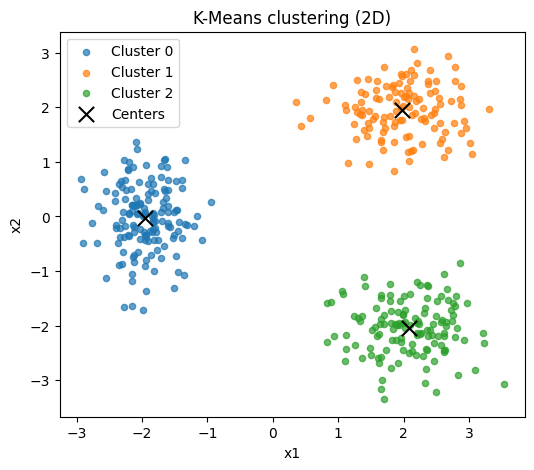

Q6: All tests passed. Marks: 15/15 (iters=4)


In [29]:
# === TEST Q6 (15 marks) ===
marks_q6 = 0
try:
    # Synthetic 2D data with 3 clusters
    rng = np.random.default_rng(123)
    A = rng.normal(loc=[-2, 0], scale=[0.4, 0.6], size=(150, 2))
    B = rng.normal(loc=[ 2, 2], scale=[0.5, 0.5], size=(120, 2))
    C = rng.normal(loc=[ 2,-2], scale=[0.5, 0.5], size=(130, 2))
    X = np.vstack([A, B, C])

    centers, labels, inertia_trace = kmeans(X, K=3, max_iter=200, tol=1e-6, seed=0)

    # (a) shapes and labels validity
    assert centers.shape == (3, 2)
    assert labels.shape[0] == X.shape[0]

    # (b) inertia should be non-increasing
    assert all(np.diff(inertia_trace) <= 1e-8)
    marks_q6 += 13

    # (c) plotting function exists (visual inspection optional)
    plot_kmeans_2d(X, centers, labels)
    marks_q6 += 2

    print(f"Q6: All tests passed. Marks: {marks_q6}/15 (iters={len(inertia_trace)})")
except AssertionError as e:
    print("Q6 tests: some checks failed:", e)
    print(f"Partial marks: {marks_q6}/15")